# Automated Classification of Well Test Responses in Naturally Fractured Reservoirs Using Unsupervised Machine Learning

This notebook aims to follow step-by-step procedure to regenarate the result of a paper entitled Automated Classification of Well Test Responses in Naturally Fractured Reservoirs Using Unsupervised Machine Learning.<br>
The is only for validation part and the final result for synthetic dataset will be in the next report


# Import Basic libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
%matplotlib inline

In [2]:
#ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")

# 1.Load data

## 1.1.Validation Dataset #1

In [2]:
FirstPressureDerivativeDataset1= pd.read_excel('WRR_Submission\Figures\Figures_Data.xlsx', sheet_name='Figure 2',header=1)

In [4]:
pd.DataFrame(FirstPressureDerivativeDataset1.head(5)) 

,Time (hr),Dual Porosity,Unnamed: 2,Unnamed: 3,Unnamed: 4,Vertical Fracture,Unnamed: 6,Unnamed: 7,Unnamed: 8,Radial Composite,Unnamed: 10,Unnamed: 11,Unnamed: 12,Radial Homogeneous,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,0.001283,8.850056,8.815821,8.781791,8.723829,2.026622,0.852161,0.432999,0.218229,8.912885,8.915073,8.915073,8.915073,8.886657,8.886657,8.886657,8.918964
1,0.001646,8.829196,8.785407,8.741953,8.668075,2.266815,0.959981,0.488866,0.246652,8.931126,8.923522,8.923522,8.923522,8.874582,8.874582,8.874582,8.917497
2,0.002111,8.813879,8.757914,8.702499,8.608509,2.537866,1.083465,0.553119,0.279406,8.930032,8.930374,8.930374,8.930374,8.917893,8.917893,8.917893,8.926993
3,0.002709,8.790932,8.719484,8.648935,8.529637,2.839838,1.223579,0.626397,0.316850,8.844493,8.934069,8.935920,8.935920,8.986130,8.986130,8.986130,8.935772
4,0.003475,8.754042,8.662952,8.573331,8.422370,3.161221,1.376925,0.707202,0.358286,8.572866,8.935213,8.940403,8.940403,8.981783,8.981783,8.981783,8.939410


## 1.2. Validation dataset #2

In [5]:
FirstPressureDerivativeDataset2= pd.read_excel('WRR_Submission\Figures\Figures_Data.xlsx', sheet_name='Figure 3',header=1)

In [6]:
pd.DataFrame(FirstPressureDerivativeDataset2.head(5)) 

,Time (hr),Dual Porosity,Unnamed: 2,Unnamed: 3,Unnamed: 4,Vertical Fracture,Unnamed: 6,Unnamed: 7,Unnamed: 8,Radial Composite,Unnamed: 10,Unnamed: 11,Unnamed: 12,Radial Homogeneous,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,0.001283,0.086199,0.577547,2.473335,8.646623,0.037073,0.106668,0.228227,0.432999,8.915073,8.915073,8.915073,8.915073,8.886657,2.547190,0.595041,0.089288
1,0.001646,0.085264,0.572236,2.446380,8.569692,0.040898,0.119641,0.257178,0.488866,8.923522,8.923522,8.923522,8.923522,8.874582,2.542160,0.593728,0.089085
2,0.002111,0.084081,0.564209,2.415986,8.483378,0.045065,0.134368,0.290354,0.553119,8.930374,8.930374,8.930374,8.930374,8.917893,2.553348,0.596235,0.089456
3,0.002709,0.082587,0.555115,2.383544,8.370870,0.049497,0.150899,0.328024,0.626397,8.934860,8.933809,8.932991,8.932708,8.986130,2.571893,0.600480,0.090089
4,0.003475,0.080712,0.545209,2.336265,8.221545,0.053874,0.168698,0.369293,0.707202,8.937344,8.934551,8.932641,8.932075,8.981783,2.569766,0.599908,0.090000


In [7]:
SecPressureDerivativeDataset2= pd.read_excel('WRR_Submission\Figures\Figures_Data.xlsx', sheet_name='Figure 6',header=1)

In [8]:
pd.DataFrame(SecPressureDerivativeDataset2.head(5)) 

,Time (hr),Dual Porosity,Unnamed: 2,Unnamed: 3,Unnamed: 4,Vertical Fracture,Unnamed: 6,Unnamed: 7,Unnamed: 8,Radial Composite,Unnamed: 10,Unnamed: 11,Unnamed: 12,Radial Homogeneous,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,0.001283,-0.043768,-0.037086,-0.043989,-0.035877,0.394217,0.460753,0.479434,0.487160,0.003803,0.003803,0.003803,0.003803,-0.005459,-0.007936,-0.008864,-0.009156
1,0.001646,-0.056117,-0.056712,-0.050188,-0.040638,0.389409,0.466037,0.487075,0.495716,0.003081,0.003081,0.003081,0.003081,0.019544,0.017628,0.016916,0.016694
2,0.002111,-0.071941,-0.065232,-0.054271,-0.053596,0.376592,0.465784,0.489693,0.499437,0.002016,0.001544,0.001176,0.001049,0.030600,0.029052,0.028480,0.028303
3,0.002709,-0.092210,-0.072279,-0.080428,-0.072258,0.340158,0.447592,0.475717,0.487074,0.001116,0.000333,-0.000157,-0.000284,-0.001942,-0.003321,-0.003827,-0.003983
4,0.003475,-0.118154,-0.101357,-0.103451,-0.087724,0.304228,0.432637,0.465597,0.478765,0.001501,0.001592,0.001899,0.002083,-0.019705,-0.020848,-0.021265,-0.021393


## 1.3.DTW matrix from MATLAB

In [3]:
DTW_MATLAB= scipy.io.loadmat('WRR_Submission\Figures\DTW_MATLAB')
matlabDTW=DTW_MATLAB['dtwForCheck']

# 2.DTW, avalable libraries and implementation

PTA data are time-series. so, it is preferable to use dynamic time warping (DTW) instead of Euclidean distance to calculate the similarity or difference between PTA curves. 
I searched about the best libraries for DTW calculation in python and dtaidistance and fastdtw are the most popular one. but it seems that the implementation in these libraries are different than that of MATLAB. Since all classification algorithm sre completely dependant on goor distance metrics, it is important to make sure we have the same similarity/difference matrix if we want to replicate the result of the paper:). so in the end of section I provided the function which can exactly replicate the result of DTW calculation in MATLAB. 

It should be noted that in this first steps I only used data from validation dataset 1 and the data is visualized as below

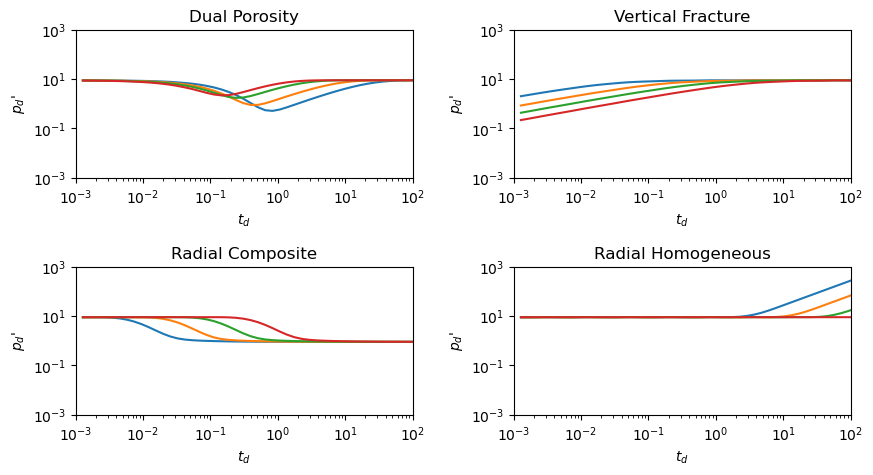

In [10]:
# Extract the dimensionless pressure data from the DataFrame
pdValuesDataset1 = (FirstPressureDerivativeDataset1.iloc[:, 1:].values).T

# create a subplot for each set
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

# plot each set in seperate figure 
for i in range(0,4):
    axs[0,0].plot(FirstPressureDerivativeDataset1.iloc[:, 0],np.where(pdValuesDataset1[i] == 0, np.nan, pdValuesDataset1[i]))
    axs[0,0].set_title("Dual Porosity")
for i in range(4,8):
    axs[0,1].plot(FirstPressureDerivativeDataset1.iloc[:, 0],np.where(pdValuesDataset1[i] == 0, np.nan, pdValuesDataset1[i]))
    axs[0,1].set_title("Vertical Fracture")
for i in range(8,12):
    axs[1,0].plot(FirstPressureDerivativeDataset1.iloc[:, 0],np.where(pdValuesDataset1[i] == 0, np.nan, pdValuesDataset1[i]))
    axs[1,0].set_title("Radial Composite")
for i in range(12,16):
    axs[1,1].plot(FirstPressureDerivativeDataset1.iloc[:, 0],np.where(pdValuesDataset1[i] == 0, np.nan, pdValuesDataset1[i]))
    axs[1,1].set_title("Radial Homogeneous")
    
# set x and y limits, scale and lable for all subplots
for i in range(2):
    for j in range(2):
        axs[i, j].set_xscale('log')
        axs[i, j].set_yscale('log')
        axs[i, j].set_xlim(0.001, 100)
        axs[i, j].set_ylim(0.001, 1000)
        axs[i, j].set_xlabel("$t_{d}$")
        axs[i, j].set_ylabel("$p_{d}$'")

#set vertical spacing between plots
fig.subplots_adjust(hspace=0.6, wspace=0.3)

# Show the plot
plt.show()
 

## 2.1.dtaidistance library

In [11]:
#pip install dtaidistance

In [12]:
from dtaidistance import dtw
# Extract the dimensionless pressure data from the DataFrame
X_sample_1 = (FirstPressureDerivativeDataset1.iloc[:, 1:].values).T

# Compute the DTW distance between each pair of curves
n_samples = X_sample_1.shape[0]

DTW_FirstDerivativeDataset1_dtaidistance = np.zeros((n_samples, n_samples))
DTW_FirstDerivativeDataset1_dtaidistance_log = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        a=X_sample_1[i]
        b=X_sample_1[j]
        #DTW_FirstDerivativeDataset1_dtaidistance[i, j] = dtw.distance(a[a!=0], b[b!=0])
        DTW_FirstDerivativeDataset1_dtaidistance_log[i, j] = dtw.distance(np.log10(a[a!=0]),np.log10(b[b!=0]))

## 2.2.fastDTW

In [13]:
#pip install fastdtw

In [14]:
from fastdtw import fastdtw
# Extract the dimensionless pressure data from the DataFrame
X_sample_1 = (FirstPressureDerivativeDataset1.iloc[:, 1:].values).T

# Compute the DTW distance between each pair of curves
n_samples = X_sample_1.shape[0]

DTW_FirstDerivativeDataset1_fastDTW = np.zeros((n_samples, n_samples))
DTW_FirstDerivativeDataset1_fastDTW_log = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        a=X_sample_1[i]
        b=X_sample_1[j]
        #DTW_FirstDerivativeDataset1_fastDTW [i, j], _  = fastdtw(a[a!=0], b[b!=0])
        DTW_FirstDerivativeDataset1_fastDTW_log [i, j], _  = fastdtw(np.log10(a[a!=0]),np.log10(b[b!=0]))


## 2.3.implementation of MATLAB function for DTW

As it is stated in MathWorks website, the implemetation of DTW in MATLAB is based on [this wikiedia webpage](https://en.wikipedia.org/wiki/Dynamic_time_warping)

In [15]:
def DTWDistance_without_window(x, y):
    n, m = len(x), len(y)
    DTW = np.zeros((n+1, m+1))
    DTW[1:, 0] = np.inf
    DTW[0, 1:] = np.inf
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(x[i-1] - y[j-1])
            DTW[i, j] = cost + min(DTW[i-1, j],    # insertion
                                   DTW[i, j-1],    # deletion
                                   DTW[i-1, j-1])  # match
    return DTW[n, m]

In [16]:
def DTWDistance_with_window(x, t, w):
    n = len(x)
    m = len(y)

    w = max(w, abs(n-m))

    DTW = np.full((n+1, m+1), np.inf)
    DTW[0, 0] = 0

    for i in range(1, n+1):
        for j in range(max(1, i-w), min(m+1, i+w)):
            DTW[i, j] = 0

    for i in range(1, n+1):
        for j in range(max(1, i-w), min(m+1, i+w)):
            cost = abs(x[i-1] - y[j-1])
            DTW[i, j] = cost + min(DTW[i-1, j], DTW[i, j-1], DTW[i-1, j-1])

    return DTW[n, m]

In [17]:
# Extract the dimensionless pressure data from the DataFrame
X_sample_1 = (FirstPressureDerivativeDataset1.iloc[:, 1:].values).T

# Compute the DTW distance between each pair of curves
n_samples = X_sample_1.shape[0]

DTW_FirstDerivativeDataset1_implemented = np.zeros((n_samples, n_samples))
DTW_FirstDerivativeDataset1_implemented_log = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        a=X_sample_1[i]
        b=X_sample_1[j]
        #DTW_FirstDerivativeDataset1_implemented[i, j] = DTWDistance_without_window(a[a!=0], b[b!=0])
        DTW_FirstDerivativeDataset1_implemented_log[i, j] = DTWDistance_without_window(np.log10(a[a!=0]),np.log10(b[b!=0]))

## 2.4.plot and compare

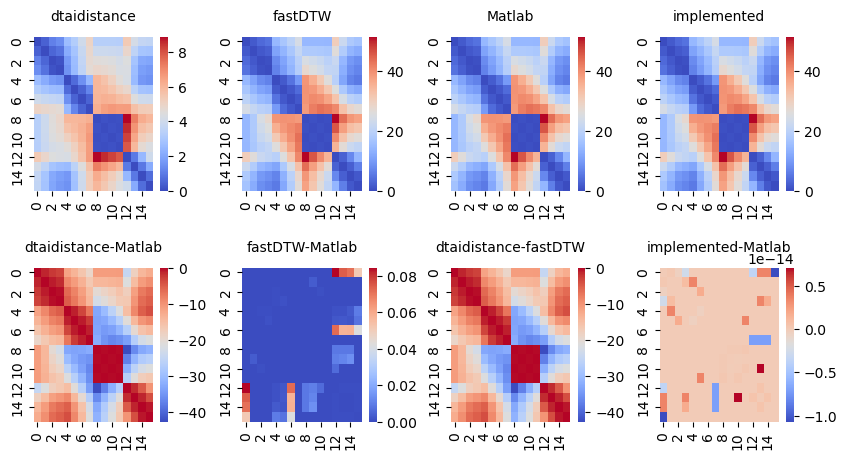

In [18]:
# create two subplots for the heatmaps
fig, ((ax11, ax12,ax13, ax14), (ax21, ax22, ax23, ax24)) = plt.subplots(ncols=4, nrows=2 , figsize=(10, 5))


sns.heatmap(DTW_FirstDerivativeDataset1_dtaidistance_log, cmap='coolwarm', ax=ax11)
ax11.set_title('dtaidistance', y=1.05,  fontsize=10)

sns.heatmap(DTW_FirstDerivativeDataset1_fastDTW_log, cmap='coolwarm', ax=ax12)
ax12.set_title('fastDTW', y=1.05,  fontsize=10)

sns.heatmap(matlabDTW, cmap='coolwarm', ax=ax13)
ax13.set_title('Matlab', y=1.05,  fontsize=10)

sns.heatmap(DTW_FirstDerivativeDataset1_implemented_log, cmap='coolwarm', ax=ax14)
ax14.set_title('implemented', y=1.05,  fontsize=10)
####
sns.heatmap(DTW_FirstDerivativeDataset1_dtaidistance_log-matlabDTW, cmap='coolwarm', ax=ax21)
ax21.set_title('dtaidistance-Matlab', y=1.05,  fontsize=10)

sns.heatmap(DTW_FirstDerivativeDataset1_fastDTW_log-matlabDTW, cmap='coolwarm', ax=ax22)
ax22.set_title('fastDTW-Matlab', y=1.05,  fontsize=10)

sns.heatmap(DTW_FirstDerivativeDataset1_dtaidistance_log-DTW_FirstDerivativeDataset1_fastDTW_log, cmap='coolwarm', ax=ax23)
ax23.set_title('dtaidistance-fastDTW', y=1.05,  fontsize=10)

sns.heatmap(DTW_FirstDerivativeDataset1_implemented_log-matlabDTW, cmap='coolwarm', ax=ax24)
ax24.set_title('implemented-Matlab', y=1.05,  fontsize=10)

# adjust spacing between subplots
plt.subplots_adjust(wspace=0.4,hspace=0.5)
# display the plot
plt.show()

So the implemented version has less than 10E-13 difference with the result of MATLAB and we use this metrics for the rest of this notebook

## 3.clustering algorithms

The next step is to choose the best implementation of K-medoid. So, I choose 2 number of clusters and checked if the algorithm is capable to produce promising result

## 3.1.k-medoid clustering algorithm from sckit-learn

In [19]:
from sklearn_extra.cluster import KMedoids

In [20]:
# Use k-medoids to cluster the well tests
n_clusters=4
max_iter=5
num_initialization=10
best_inertia = float('inf')  # initialize a large value for best inertia
best_kmedoids = None
for i in range(num_initialization):  # number of initializations
    kmedoids = KMedoids(n_clusters, max_iter=max_iter, init='random')
    kmedoids.fit(DTW_FirstDerivativeDataset1_implemented_log)
    if kmedoids.inertia_ < best_inertia:
        best_inertia = kmedoids.inertia_
        best_kmedoids = kmedoids
cluster_assignments_dataset1 = best_kmedoids.labels_
medoids_index_dataset1 = best_kmedoids.medoid_indices_

### 3.1.1 plotting the result

the graph below shows the all curves together which have different color with respect to their cluster medoid

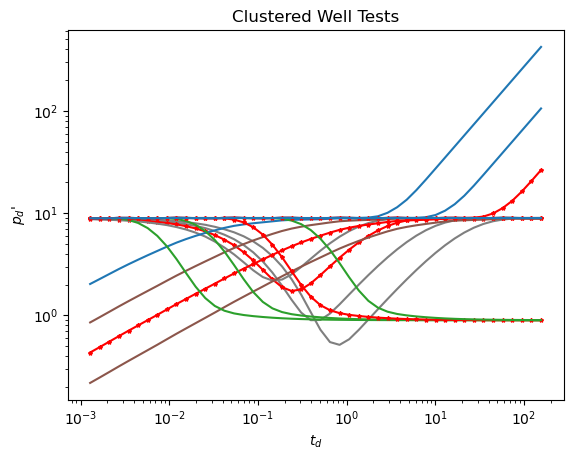

In [21]:
# Plot each curve  
for i in range(n_samples):
    if i in medoids_index_dataset1 :
        plt.plot(FirstPressureDerivativeDataset1.iloc[:, 0],np.where(X_sample_1[i] == 0, np.nan, X_sample_1[i]), marker='*', markersize=3, color='red')
    else:
        plt.plot(FirstPressureDerivativeDataset1.iloc[:, 0],np.where(X_sample_1[i] == 0, np.nan, X_sample_1[i]), color=plt.cm.tab10(cluster_assignments_dataset1[i] /n_clusters)) 

# Add a title and labels to the plot
plt.title("Clustered Well Tests")
plt.xlabel("$t_{d}$")
plt.ylabel("$p_{d}$'")
plt.xscale('log')
plt.yscale('log')
# Show the plot
plt.show()

Also, we plotted the figures seperated by their clusters

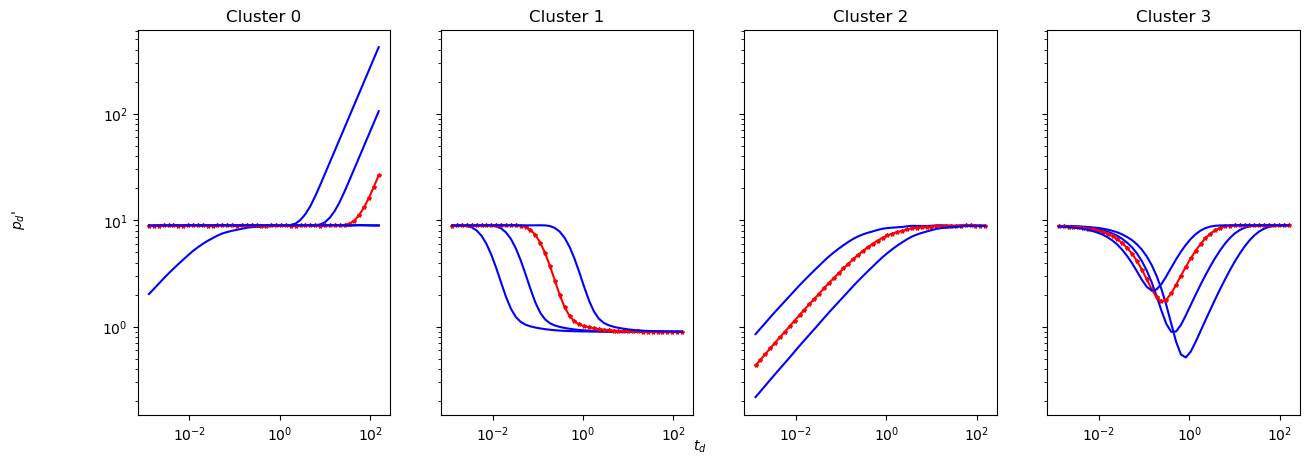

In [22]:
unique_clusters = np.unique(cluster_assignments_dataset1)
# create a subplot for each cluster
fig, axs = plt.subplots(1, n_clusters, figsize=(15, 5), sharey=True)

for i, cluster in enumerate(unique_clusters):
    # plot the curves for this cluster
    for j in range(n_samples):
        if cluster_assignments_dataset1[j] == cluster:
            if j in medoids_index_dataset1 :
                axs[i].plot(FirstPressureDerivativeDataset1.iloc[:, 0], np.where(X_sample_1[j] == 0, np.nan, X_sample_1[j]), marker='*', markersize=3, color='red')
            else:
                axs[i].plot(FirstPressureDerivativeDataset1.iloc[:, 0], np.where(X_sample_1[j] == 0, np.nan, X_sample_1[j]), color='b') 
    
    axs[i].set_title(f"Cluster {cluster}")
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')

# Add labels to the plot
fig.text(0.5, 0.04, "$t_{d}$", ha='center')
fig.text(0.04, 0.5, "$p_{d}$'", va='center', rotation='vertical')

# Show the plot
plt.show()

Since here the only important thing is the performace of grouping(and the lable of the groups does not carry meaningful explanation) we should use Adjusted Rand index.  The ARI is a measure of the similarity between two label assignments, adjusted for chance. It takes values between -1 and 1, where values close to 1 indicate that the clustering results are very similar to the actual labels, and values close to -1 indicate that the clustering results are very different from the actual labels.

In [23]:
from sklearn.metrics import adjusted_rand_score

In [24]:
DataframePdDataset1 = pd.DataFrame((FirstPressureDerivativeDataset1.iloc[:, 1:].values).T)
lables=[0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3]
DataframePdDataset1['lables']=lables
DataframePdDataset1['cluster_assignments']=cluster_assignments_dataset1
ari = adjusted_rand_score(DataframePdDataset1['lables'], DataframePdDataset1['cluster_assignments'])
print("Adjusted Rand index: ", ari)

Adjusted Rand index:  0.8205128205128205


After Running the algorithm multiple times, I realized that sometimes it might assign one curve to a wrong cluster ( 82<ARI=<100).

## 3.2.Implementation of MATLAB code for clustering

here is the implemented version of MATLAB code for K-medioid clustering which was prvided by authors. It should be noted that I didn't covert this into a function because if we want to do plotting we should update some lines of the code for that

In [25]:
# remove rows with zero values
firstDerivativePressure_log = FirstPressureDerivativeDataset1[~(FirstPressureDerivativeDataset1 == 0).any(axis=1)]

# remove rows with NaN values
firstDerivativePressure_log = firstDerivativePressure_log.dropna()
firstDerivativePressure_log= np.log10(firstDerivativePressure_log[firstDerivativePressure_log!=0].iloc[:, 1:].values.T)

K=[4]
#K = [2,4,6,8]  # This script allows to run tests for different number of clusters

# Maximum Number of Iterations
maxIter = 5
# Maximum Number of Initializations
maxInitializations = 10

totalDistanceperClusteringAllClusters = np.zeros((len(K), maxIter))
totalMinimumAssignperClusteringAllClusters = np.zeros((len(K), len(firstDerivativePressure_log)))
distanceMultInitAllClusters= np.zeros((maxInitializations*maxIter, maxIter))
assignMultInitAllClusters= np.zeros((maxInitializations*maxIter,firstDerivativePressure_log.shape[0]))
totalMinimumDistanceperClusteringAllClusters=np.zeros((len(K), maxIter))
totalMinimumAssignperClusteringAllClusters=np.zeros((len(K), firstDerivativePressure_log.shape[0]))
for clusters in range(len(K)):
    distanceMultInit= np.zeros((maxInitializations,maxIter))
    assignMultInit= np.zeros((maxInitializations,firstDerivativePressure_log.shape[0]))
    for multipleInit in range(maxInitializations):

        # Initialize the centroids to be random samples
        # Randomly reorder the indices of examples
        randidx = np.random.permutation(firstDerivativePressure_log.shape[0])
        # Take the first K examples as centroids
        centroids = firstDerivativePressure_log[randidx[:K[clusters]], :]
        
        # Cluster Assignment Step
        totalDistance = np.zeros((maxIter,))
        assign = np.zeros((len(firstDerivativePressure_log),))

        for i in range(len(firstDerivativePressure_log)):
            distance = np.zeros((K[clusters],))
            for j in range(K[clusters]):
                a = firstDerivativePressure_log[i, :]    
                b = centroids[j, :]
                distance[j]=DTWDistance_without_window(a,b)
            M, assign[i] = distance.min(), distance.argmin()
            # accumulative 
            totalDistance[0] += M # measures the total distance from every point to its respective cluster
        
        for iter in range(1, maxIter):
            # Averaging (point that minimizes the distance to the members of the cluster) and updating centroids
            for n in range(K[clusters]):
                assignTemp = (assign==n)
                clusterMatrix = firstDerivativePressure_log[assignTemp, :]
                intraClusterDist = np.zeros((clusterMatrix.shape[0],))
                for i in range(clusterMatrix.shape[0]):
                    a = clusterMatrix[i, :]
                    tempDist = 0
                    for j in range(clusterMatrix.shape[0]):
                        b = clusterMatrix[j, :]
                        tempDist += DTWDistance_without_window(a, b)
                        intraClusterDist[i] = tempDist
                _, newCentroidRow = intraClusterDist.min(), intraClusterDist.argmin()
                centroids[n, :] = clusterMatrix[newCentroidRow, :]
        
        
            # Reassigning points to updated centroids
            totalDistance[iter] = 0
            for i in range(len(firstDerivativePressure_log)):
                distance = np.zeros((K[clusters],))
                for j in range(K[clusters]):                    
                    a = firstDerivativePressure_log[i, :]    
                    b = centroids[j, :]
                    distance[j] = DTWDistance_without_window(a, b)
                MMM, assign[i] = distance.min(), distance.argmin()
                totalDistance[iter] += MMM # measures the total distance from every point to its respective cluster
        distanceMultInit[multipleInit, :] = totalDistance # summarizes the total distance per iteration for each initialization
        assignMultInit[multipleInit, :] = assign
        
        totalDistMinimumColumn = distanceMultInit[:,maxIter-1]
        B = np.argmin(totalDistMinimumColumn)
        totalMinimumDistanceperClustering = distanceMultInit[B,:]
        totalMinimumAssignperClustering = assignMultInit[B,:]
    
    distanceMultInitAllClusters[((clusters)*multipleInit):((clusters)*multipleInit)+maxInitializations,:] = distanceMultInit
    assignMultInitAllClusters[((clusters)*multipleInit):((clusters)*multipleInit)+maxInitializations,:] = assignMultInit

    totalMinimumDistanceperClusteringAllClusters[clusters,:] = totalMinimumDistanceperClustering
    totalMinimumAssignperClusteringAllClusters[clusters,:] = totalMinimumAssignperClustering



### 3.2.1 plotting the result

the graph below shows the all curves together which have different color with respect to their category

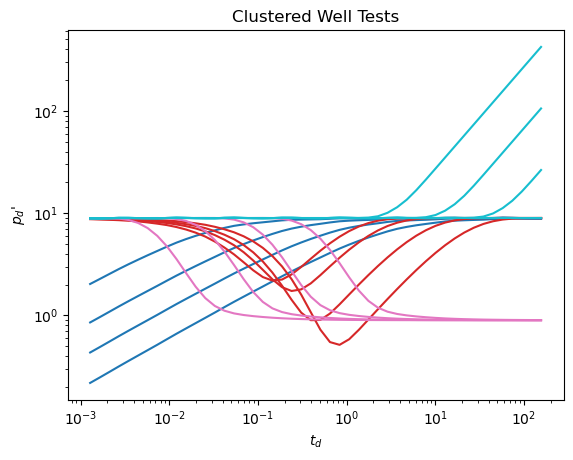

In [26]:
# Define color map for clusters
colorMap = plt.cm.tab10(np.linspace(0,1,4))
# Plot curves and add legend
for i in range(4):
    clusterIndices = np.where(totalMinimumAssignperClusteringAllClusters[clusters] == i)[0] 
    for j in clusterIndices:
        plt.loglog(FirstPressureDerivativeDataset1[~(FirstPressureDerivativeDataset1 == 0).any(axis=1)].values[:,0], FirstPressureDerivativeDataset1[~(FirstPressureDerivativeDataset1 == 0).any(axis=1)].values[:,j+1], color=colorMap[i,:])
# Add a title and labels to the plot
plt.title("Clustered Well Tests")
plt.xlabel("$t_{d}$")
plt.ylabel("$p_{d}$'")
plt.xscale('log')
plt.yscale('log')

And this code plots curves which blong to each cluster seperatly 

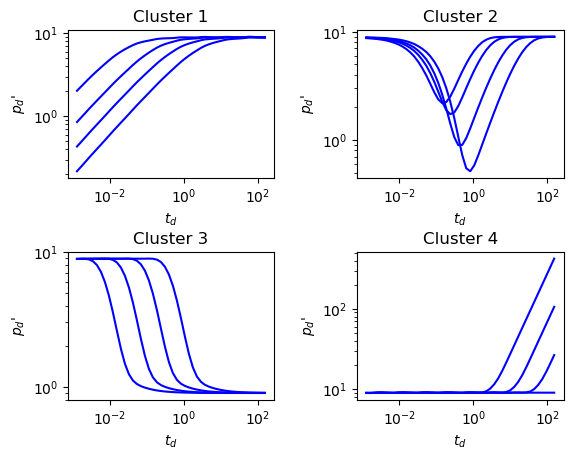

In [27]:
#Create subplots for each cluster
for i in range(4):
    plt.subplot(2, 2, i+1)
    clusterIndices = np.where(totalMinimumAssignperClusteringAllClusters[clusters] == i)[0]
    for j in clusterIndices:
        # Create log-log plot
        plt.loglog(FirstPressureDerivativeDataset1[~(FirstPressureDerivativeDataset1 == 0).any(axis=1)].values[:,0], FirstPressureDerivativeDataset1[~(FirstPressureDerivativeDataset1 == 0).any(axis=1)].values[:,j+1], color='blue')
    # Add labels and title
    plt.xlabel("$t_{d}$")
    plt.ylabel("$p_{d}$'")
    plt.title('Cluster ' + str(i+1))
# adjust spacing between subplots
plt.subplots_adjust(wspace=0.4,hspace=0.5)
plt.show()

In [28]:
DataframePdDataset1 = pd.DataFrame((FirstPressureDerivativeDataset1.iloc[:, 1:].values).T)
lables=[0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3]
DataframePdDataset1['lables']=lables
DataframePdDataset1['cluster_assignments']=totalMinimumAssignperClusteringAllClusters[0]
ari = adjusted_rand_score(DataframePdDataset1['lables'], DataframePdDataset1['cluster_assignments'])
print("Adjusted Rand index: ", ari)

Adjusted Rand index:  1.0


I ran the implemented version multiple time and it gave me ARI=1 in allinstances so I will use this for the rest of the code

# 4. Replication of the result fot validation 

## 4.1. Dataset number 1

### 4.1.1. Fig 9.

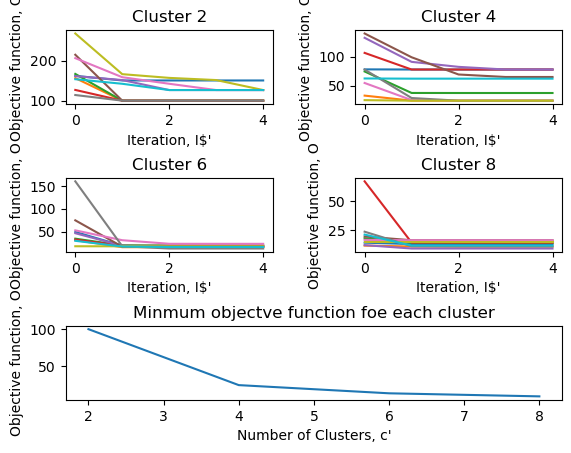

In [50]:
# remove rows with zero values
firstDerivativePressure_log = FirstPressureDerivativeDataset1[~(FirstPressureDerivativeDataset1 == 0).any(axis=1)]

# remove rows with NaN values
firstDerivativePressure_log = firstDerivativePressure_log.dropna()
firstDerivativePressure_log= np.log10(firstDerivativePressure_log[firstDerivativePressure_log!=0].iloc[:, 1:].values.T)

#K=[2,4]
K = [2,4,6,8]  # This script allows to run tests for different number of clusters

# Maximum Number of Iterations
maxIter = 5
# Maximum Number of Initializations
maxInitializations = 10

totalDistanceperClusteringAllClusters = np.zeros((len(K), maxIter))
totalMinimumAssignperClusteringAllClusters = np.zeros((len(K), len(firstDerivativePressure_log)))
distanceMultInitAllClusters= np.zeros((maxInitializations*maxIter, maxIter))
assignMultInitAllClusters= np.zeros((maxInitializations*maxIter,firstDerivativePressure_log.shape[0]))
totalMinimumDistanceperClusteringAllClusters=np.zeros((len(K), maxIter))
totalMinimumAssignperClusteringAllClusters=np.zeros((len(K), firstDerivativePressure_log.shape[0]))
for clusters in range(len(K)):
    distanceMultInit= np.zeros((maxInitializations,maxIter))
    assignMultInit= np.zeros((maxInitializations,firstDerivativePressure_log.shape[0]))
    for multipleInit in range(maxInitializations):

        # Initialize the centroids to be random samples
        # Randomly reorder the indices of examples
        randidx = np.random.permutation(firstDerivativePressure_log.shape[0])
        # Take the first K examples as centroids
        centroids = firstDerivativePressure_log[randidx[:K[clusters]], :]
        
        # Cluster Assignment Step
        totalDistance = np.zeros((maxIter,))
        assign = np.zeros((len(firstDerivativePressure_log),))

        for i in range(len(firstDerivativePressure_log)):
            distance = np.zeros((K[clusters],))
            for j in range(K[clusters]):
                a = firstDerivativePressure_log[i, :]    
                b = centroids[j, :]
                distance[j]=DTWDistance_without_window(a,b)
            M, assign[i] = distance.min(), distance.argmin()
            # accumulative 
            totalDistance[0] += M # measures the total distance from every point to its respective cluster
        
        for iter in range(1, maxIter):
            # Averaging (point that minimizes the distance to the members of the cluster) and updating centroids
            for n in range(K[clusters]):
                assignTemp = (assign==n)
                clusterMatrix = firstDerivativePressure_log[assignTemp, :]
                intraClusterDist = np.zeros((clusterMatrix.shape[0],))
                for i in range(clusterMatrix.shape[0]):
                    a = clusterMatrix[i, :]
                    tempDist = 0
                    for j in range(clusterMatrix.shape[0]):
                        b = clusterMatrix[j, :]
                        tempDist += DTWDistance_without_window(a, b)
                        intraClusterDist[i] = tempDist
                _, newCentroidRow = intraClusterDist.min(), intraClusterDist.argmin()
                centroids[n, :] = clusterMatrix[newCentroidRow, :]
        
        
            # Reassigning points to updated centroids
            totalDistance[iter] = 0
            for i in range(len(firstDerivativePressure_log)):
                distance = np.zeros((K[clusters],))
                for j in range(K[clusters]):                    
                    a = firstDerivativePressure_log[i, :]    
                    b = centroids[j, :]
                    distance[j] = DTWDistance_without_window(a, b)
                MMM, assign[i] = distance.min(), distance.argmin()
                totalDistance[iter] += MMM # measures the total distance from every point to its respective cluster
        #plotting Objective function per iteration
        plt.subplot(3, 2, clusters+1)
        totalDistance_forPlot=totalDistance
        plt.plot(range(maxIter),totalDistance_forPlot)
        totalDistance_forPlot=[]
        plt.ylabel("Objective function, O")
        plt.xlabel("Iteration, I$'")
        plt.title('Cluster ' + str(K[clusters]))
    
        distanceMultInit[multipleInit, :] = totalDistance # summarizes the total distance per iteration for each initialization
        assignMultInit[multipleInit, :] = assign
        
        totalDistMinimumColumn = distanceMultInit[:,maxIter-1]
        B = np.argmin(totalDistMinimumColumn)
        totalMinimumDistanceperClustering = distanceMultInit[B,:]
        totalMinimumAssignperClustering = assignMultInit[B,:]
    
    distanceMultInitAllClusters[((clusters)*multipleInit):((clusters)*multipleInit)+maxInitializations,:] = distanceMultInit
    assignMultInitAllClusters[((clusters)*multipleInit):((clusters)*multipleInit)+maxInitializations,:] = assignMultInit

    totalMinimumDistanceperClusteringAllClusters[clusters,:] = totalMinimumDistanceperClustering
    totalMinimumAssignperClusteringAllClusters[clusters,:] = totalMinimumAssignperClustering

totalMinimumDistanceperClusteringAllClusters_forPlot = np.amin(totalMinimumDistanceperClusteringAllClusters, axis=1)
mergePlot = plt.subplot2grid((3, 2), (2, 0), colspan=2)
mergePlot.plot(K,totalMinimumDistanceperClusteringAllClusters_forPlot)
plt.ylabel("Objective function, O")
plt.xlabel("Number of Clusters, c'")
plt.title('Minmum objectve function foe each cluster')
plt.subplots_adjust(wspace=0.4,hspace=1)
plt.show()

In [45]:
from pretty_confusion_matrix import pp_matrix_from_data
from statistics import mode

Adjusted Rand index:  1.0


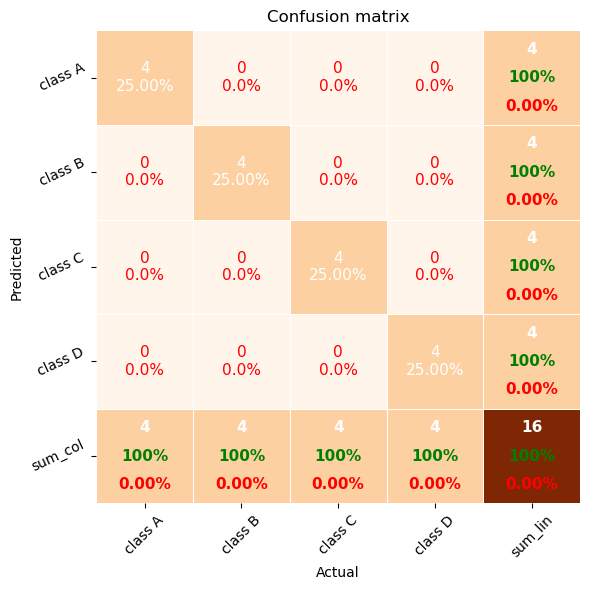

In [49]:
DataframePdDataset1 = pd.DataFrame((FirstPressureDerivativeDataset1.iloc[:, 1:].values).T)
predictedClass=totalMinimumAssignperClusteringAllClusters[1]
lables_forPrediction=[mode(predictedClass[0:4]),mode(predictedClass[0:4]),mode(predictedClass[0:4]),mode(predictedClass[0:4]),
                     mode(predictedClass[4:8]),mode(predictedClass[4:8]),mode(predictedClass[4:8]),mode(predictedClass[4:8]),
                     mode(predictedClass[8:12]),mode(predictedClass[8:12]),mode(predictedClass[8:12]),mode(predictedClass[8:12]),
                     mode(predictedClass[12:16]),mode(predictedClass[12:16]),mode(predictedClass[12:16]),mode(predictedClass[12:16]),]
DataframePdDataset1['lables_forPrediction']=lables_forPrediction
DataframePdDataset1['cluster_assignments']=predictedClass
ari = adjusted_rand_score(DataframePdDataset1['lables_forPrediction'], DataframePdDataset1['cluster_assignments'])
print("Adjusted Rand index: ", ari)
pp_matrix_from_data(DataframePdDataset1['lables_forPrediction'], DataframePdDataset1['cluster_assignments'], figsize=[6,6])


## 4.2 Dataset number 2

For dataset number 2 we add a displacement of the curves in the vertical direction by varying the reservoir permeability. It is know that DTW can not handle differences in the vertical direction properly so it may raise some difficulties with classification. Let's check it!

### 4.2.1 Fig 8.

here is the visualization of p'd vs. td curves in dataset number 2

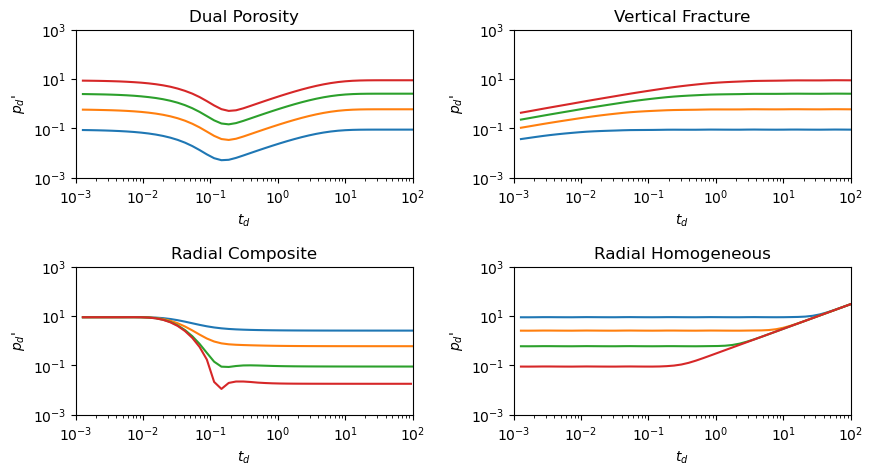

In [32]:
# Extract the dimensionless pressure data from the DataFrame
pdValuesDataset2 = (FirstPressureDerivativeDataset2.iloc[:, 1:].values).T

# create a subplot for each set
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

# plot each set in seperate figure 
for i in range(0,4):
    axs[0,0].plot(FirstPressureDerivativeDataset2.iloc[:, 0],np.where(pdValuesDataset2[i] == 0, np.nan, pdValuesDataset2[i]))
    axs[0,0].set_title("Dual Porosity")
for i in range(4,8):
    axs[0,1].plot(FirstPressureDerivativeDataset2.iloc[:, 0],np.where(pdValuesDataset2[i] == 0, np.nan, pdValuesDataset2[i]))
    axs[0,1].set_title("Vertical Fracture")
for i in range(8,12):
    axs[1,0].plot(FirstPressureDerivativeDataset2.iloc[:, 0],np.where(pdValuesDataset2[i] == 0, np.nan, pdValuesDataset2[i]))
    axs[1,0].set_title("Radial Composite")
for i in range(12,16):
    axs[1,1].plot(FirstPressureDerivativeDataset2.iloc[:, 0],np.where(pdValuesDataset2[i] == 0, np.nan, pdValuesDataset2[i]))
    axs[1,1].set_title("Radial Homogeneous")
    
# set x and y limits, scale and lable for all subplots
for i in range(2):
    for j in range(2):
        axs[i, j].set_xscale('log')
        axs[i, j].set_yscale('log')
        axs[i, j].set_xlim(0.001, 100)
        axs[i, j].set_ylim(0.001, 1000)
        axs[i, j].set_xlabel("$t_{d}$")
        axs[i, j].set_ylabel("$p_{d}$'")

#set vertical spacing between plots
fig.subplots_adjust(hspace=0.6, wspace=0.3)

# Show the plot
plt.show()
 

Now we run clustering algorithm in this data set to see if we are able to classify the curves

In [33]:
# remove rows with zero values
firstDerivativePressure_log = FirstPressureDerivativeDataset2[~(FirstPressureDerivativeDataset2 == 0).any(axis=1)]

# remove rows with NaN values
firstDerivativePressure_log = firstDerivativePressure_log.dropna()
firstDerivativePressure_log= np.log10(firstDerivativePressure_log[firstDerivativePressure_log!=0].iloc[:, 1:].values.T)

K=[4]

# Maximum Number of Iterations
maxIter = 5
# Maximum Number of Initializations
maxInitializations = 10

totalDistanceperClusteringAllClusters = np.zeros((len(K), maxIter))
totalMinimumAssignperClusteringAllClusters = np.zeros((len(K), len(firstDerivativePressure_log)))
distanceMultInitAllClusters= np.zeros((maxInitializations*maxIter, maxIter))
assignMultInitAllClusters= np.zeros((maxInitializations*maxIter,firstDerivativePressure_log.shape[0]))
totalMinimumDistanceperClusteringAllClusters=np.zeros((len(K), maxIter))
totalMinimumAssignperClusteringAllClusters=np.zeros((len(K), firstDerivativePressure_log.shape[0]))
for clusters in range(len(K)):
    distanceMultInit= np.zeros((maxInitializations,maxIter))
    assignMultInit= np.zeros((maxInitializations,firstDerivativePressure_log.shape[0]))
    for multipleInit in range(maxInitializations):

        # Initialize the centroids to be random samples
        # Randomly reorder the indices of examples
        randidx = np.random.permutation(firstDerivativePressure_log.shape[0])
        # Take the first K examples as centroids
        centroids = firstDerivativePressure_log[randidx[:K[clusters]], :]
        
        # Cluster Assignment Step
        totalDistance = np.zeros((maxIter,))
        assign = np.zeros((len(firstDerivativePressure_log),))

        for i in range(len(firstDerivativePressure_log)):
            distance = np.zeros((K[clusters],))
            for j in range(K[clusters]):
                a = firstDerivativePressure_log[i, :]    
                b = centroids[j, :]
                distance[j]=DTWDistance_without_window(a,b)
            M, assign[i] = distance.min(), distance.argmin()
            # accumulative 
            totalDistance[0] += M # measures the total distance from every point to its respective cluster
        
        for iter in range(1, maxIter):
            # Averaging (point that minimizes the distance to the members of the cluster) and updating centroids
            for n in range(K[clusters]):
                assignTemp = (assign==n)
                clusterMatrix = firstDerivativePressure_log[assignTemp, :]
                intraClusterDist = np.zeros((clusterMatrix.shape[0],))
                for i in range(clusterMatrix.shape[0]):
                    a = clusterMatrix[i, :]
                    tempDist = 0
                    for j in range(clusterMatrix.shape[0]):
                        b = clusterMatrix[j, :]
                        tempDist += DTWDistance_without_window(a, b)
                        intraClusterDist[i] = tempDist
                _, newCentroidRow = intraClusterDist.min(), intraClusterDist.argmin()
                centroids[n, :] = clusterMatrix[newCentroidRow, :]
        
        
            # Reassigning points to updated centroids
            totalDistance[iter] = 0
            for i in range(len(firstDerivativePressure_log)):
                distance = np.zeros((K[clusters],))
                for j in range(K[clusters]):                    
                    a = firstDerivativePressure_log[i, :]    
                    b = centroids[j, :]
                    distance[j] = DTWDistance_without_window(a, b)
                MMM, assign[i] = distance.min(), distance.argmin()
                totalDistance[iter] += MMM # measures the total distance from every point to its respective cluster
        distanceMultInit[multipleInit, :] = totalDistance # summarizes the total distance per iteration for each initialization
        assignMultInit[multipleInit, :] = assign
        
        totalDistMinimumColumn = distanceMultInit[:,maxIter-1]
        B = np.argmin(totalDistMinimumColumn)
        totalMinimumDistanceperClustering = distanceMultInit[B,:]
        totalMinimumAssignperClustering = assignMultInit[B,:]
    
    distanceMultInitAllClusters[((clusters)*multipleInit):((clusters)*multipleInit)+maxInitializations,:] = distanceMultInit
    assignMultInitAllClusters[((clusters)*multipleInit):((clusters)*multipleInit)+maxInitializations,:] = assignMultInit

    totalMinimumDistanceperClusteringAllClusters[clusters,:] = totalMinimumDistanceperClustering
    totalMinimumAssignperClusteringAllClusters[clusters,:] = totalMinimumAssignperClustering



the graph below shows the all curves together which have different color with respect to their category

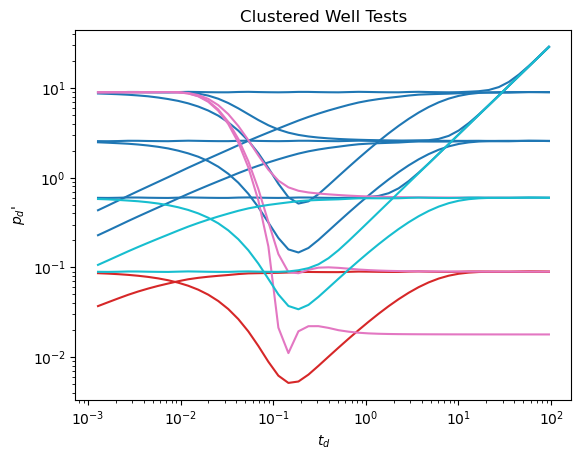

In [34]:
# Define color map for clusters
colorMap = plt.cm.tab10(np.linspace(0,1,4))
# Plot curves and add legend
for i in range(4):
    clusterIndices = np.where(totalMinimumAssignperClusteringAllClusters[clusters] == i)[0] 
    for j in clusterIndices:
        plt.loglog(FirstPressureDerivativeDataset2[~(FirstPressureDerivativeDataset2 == 0).any(axis=1)].values[:,0], FirstPressureDerivativeDataset2[~(FirstPressureDerivativeDataset2 == 0).any(axis=1)].values[:,j+1], color=colorMap[i,:])
# Add a title and labels to the plot
plt.title("Clustered Well Tests")
plt.xlabel("$t_{d}$")
plt.ylabel("$p_{d}$'")
plt.xscale('log')
plt.yscale('log')

And this code plots curves which blong to each cluster seperatly 

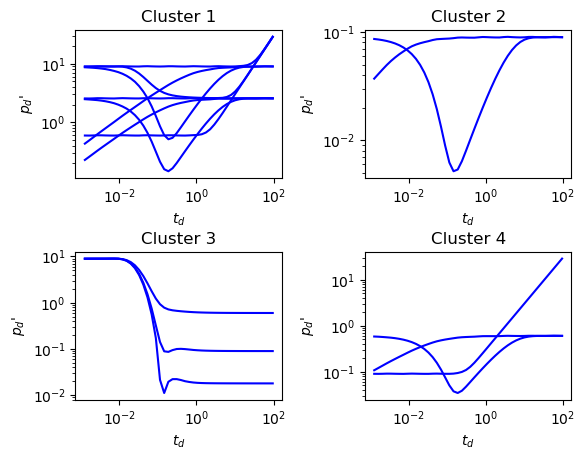

In [35]:
#Create subplots for each cluster
for i in range(4):
    plt.subplot(2, 2, i+1)
    clusterIndices = np.where(totalMinimumAssignperClusteringAllClusters[clusters] == i)[0]
    for j in clusterIndices:
        # Create log-log plot
        plt.loglog(FirstPressureDerivativeDataset2[~(FirstPressureDerivativeDataset2 == 0).any(axis=1)].values[:,0], FirstPressureDerivativeDataset2[~(FirstPressureDerivativeDataset2== 0).any(axis=1)].values[:,j+1], color='blue')
    # Add labels and title
    plt.xlabel("$t_{d}$")
    plt.ylabel("$p_{d}$'")
    plt.title('Cluster ' + str(i+1))
# adjust spacing between subplots
plt.subplots_adjust(wspace=0.4,hspace=0.5)
plt.show()

In [36]:
DataframePdDataset2 = pd.DataFrame((FirstPressureDerivativeDataset2.iloc[:, 1:].values).T)
predictedClass=totalMinimumAssignperClusteringAllClusters[0]
lables_forPrediction=[mode(predictedClass[0:4]),mode(predictedClass[0:4]),mode(predictedClass[0:4]),mode(predictedClass[0:4]),
                     mode(predictedClass[4:8]),mode(predictedClass[4:8]),mode(predictedClass[4:8]),mode(predictedClass[4:8]),
                     mode(predictedClass[8:12]),mode(predictedClass[8:12]),mode(predictedClass[8:12]),mode(predictedClass[8:12]),
                     mode(predictedClass[12:16]),mode(predictedClass[12:16]),mode(predictedClass[12:16]),mode(predictedClass[12:16]),]
ari = adjusted_rand_score(lables_forPrediction, predictedClass)
print("Adjusted Rand index: ", ari)


Adjusted Rand index:  0.2153846153846154


### 4.3.2. Fig 11.

It seems DTW is not able to distinguish vwerical differences between curves, so we decidd to work on second dreivative of pressure

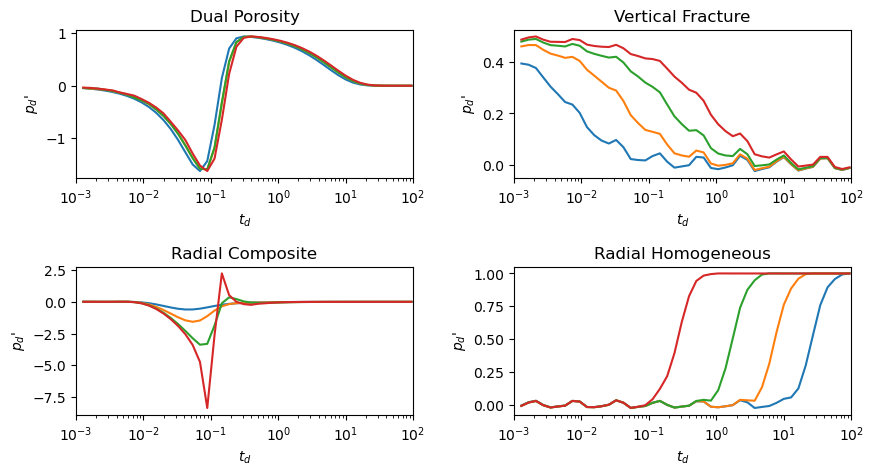

In [37]:
# Extract the dimensionless pressure data from the DataFrame
SecpdValuesDataset2 = (SecPressureDerivativeDataset2.iloc[:, 1:].values).T

# create a subplot for each set
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

# plot each set in seperate figure 
for i in range(0,4):
    axs[0,0].plot(SecPressureDerivativeDataset2.iloc[:, 0],np.where(SecpdValuesDataset2[i] == 0, np.nan, SecpdValuesDataset2[i]))
    axs[0,0].set_title("Dual Porosity")
for i in range(4,8):
    axs[0,1].plot(SecPressureDerivativeDataset2.iloc[:, 0],np.where(SecpdValuesDataset2[i] == 0, np.nan, SecpdValuesDataset2[i]))
    axs[0,1].set_title("Vertical Fracture")
for i in range(8,12):
    axs[1,0].plot(SecPressureDerivativeDataset2.iloc[:, 0],np.where(SecpdValuesDataset2[i] == 0, np.nan, SecpdValuesDataset2[i]))
    axs[1,0].set_title("Radial Composite")
for i in range(12,16):
    axs[1,1].plot(SecPressureDerivativeDataset2.iloc[:, 0],np.where(SecpdValuesDataset2[i] == 0, np.nan, SecpdValuesDataset2[i]))
    axs[1,1].set_title("Radial Homogeneous")
    
# set x and y limits, scale and lable for all subplots
for i in range(2):
    for j in range(2):
        axs[i, j].set_xscale('log')
        axs[i, j].set_xlim(0.001, 100) 
        axs[i, j].set_xlabel("$t_{d}$")
        axs[i, j].set_ylabel("$p_{d}$'")

#set vertical spacing between plots
fig.subplots_adjust(hspace=0.6, wspace=0.3)

# Show the plot
plt.show()
 

Now we run clustering algorithm in this data set to see if we are able to classify the curves

In [51]:
# remove rows with zero values
secDerivativePressure_log = SecPressureDerivativeDataset2[~(SecPressureDerivativeDataset2 == 0).any(axis=1)]
#print(secDerivativePressure_log)
# remove rows with NaN values
secDerivativePressure_log = secDerivativePressure_log.dropna()

secDerivativePressure_log= secDerivativePressure_log[secDerivativePressure_log!=0].iloc[:, 1:].values.T

K=[4]

# Maximum Number of Iterations
maxIter = 5
# Maximum Number of Initializations
maxInitializations = 10

totalDistanceperClusteringAllClusters = np.zeros((len(K), maxIter))
totalMinimumAssignperClusteringAllClusters = np.zeros((len(K), len(secDerivativePressure_log)))
distanceMultInitAllClusters= np.zeros((maxInitializations*maxIter, maxIter))
assignMultInitAllClusters= np.zeros((maxInitializations*maxIter,secDerivativePressure_log.shape[0]))
totalMinimumDistanceperClusteringAllClusters=np.zeros((len(K), maxIter))
totalMinimumAssignperClusteringAllClusters=np.zeros((len(K), secDerivativePressure_log.shape[0]))
for clusters in range(len(K)):
    distanceMultInit= np.zeros((maxInitializations,maxIter))
    assignMultInit= np.zeros((maxInitializations,secDerivativePressure_log.shape[0]))
    for multipleInit in range(maxInitializations):

        # Initialize the centroids to be random samples
        # Randomly reorder the indices of examples
        randidx = np.random.permutation(secDerivativePressure_log.shape[0])
        # Take the first K examples as centroids
        centroids = secDerivativePressure_log[randidx[:K[clusters]], :]
        
        # Cluster Assignment Step
        totalDistance = np.zeros((maxIter,))
        assign = np.zeros((len(secDerivativePressure_log),))

        for i in range(len(secDerivativePressure_log)):
            distance = np.zeros((K[clusters],))
            for j in range(K[clusters]):
                a = secDerivativePressure_log[i, :]    
                b = centroids[j, :]
                distance[j]=DTWDistance_without_window(a,b)
            M, assign[i] = distance.min(), distance.argmin()
            # accumulative 
            totalDistance[0] += M # measures the total distance from every point to its respective cluster
        
        for iter in range(1, maxIter):
            # Averaging (point that minimizes the distance to the members of the cluster) and updating centroids
            for n in range(K[clusters]):
                assignTemp = (assign==n)
                clusterMatrix = secDerivativePressure_log[assignTemp, :]
                intraClusterDist = np.zeros((clusterMatrix.shape[0],))
                for i in range(clusterMatrix.shape[0]):
                    a = clusterMatrix[i, :]
                    tempDist = 0
                    for j in range(clusterMatrix.shape[0]):
                        b = clusterMatrix[j, :]
                        tempDist += DTWDistance_without_window(a, b)
                        intraClusterDist[i] = tempDist
                        #print(intraClusterDist)
                _, newCentroidRow = intraClusterDist.min(), intraClusterDist.argmin()
                centroids[n, :] = clusterMatrix[newCentroidRow, :]
        
        
            # Reassigning points to updated centroids
            totalDistance[iter] = 0
            for i in range(len(secDerivativePressure_log)):
                distance = np.zeros((K[clusters],))
                for j in range(K[clusters]):                    
                    a = secDerivativePressure_log[i, :]    
                    b = centroids[j, :]
                    distance[j] = DTWDistance_without_window(a, b)
                MMM, assign[i] = distance.min(), distance.argmin()
                totalDistance[iter] += MMM # measures the total distance from every point to its respective cluster
        distanceMultInit[multipleInit, :] = totalDistance # summarizes the total distance per iteration for each initialization
        assignMultInit[multipleInit, :] = assign
        
        totalDistMinimumColumn = distanceMultInit[:,maxIter-1]
        B = np.argmin(totalDistMinimumColumn)
        totalMinimumDistanceperClustering = distanceMultInit[B,:]
        totalMinimumAssignperClustering = assignMultInit[B,:]
    
    distanceMultInitAllClusters[((clusters)*multipleInit):((clusters)*multipleInit)+maxInitializations,:] = distanceMultInit
    assignMultInitAllClusters[((clusters)*multipleInit):((clusters)*multipleInit)+maxInitializations,:] = assignMultInit

    totalMinimumDistanceperClusteringAllClusters[clusters,:] = totalMinimumDistanceperClustering
    totalMinimumAssignperClusteringAllClusters[clusters,:] = totalMinimumAssignperClustering



the graph below shows the all curves together which have different color with respect to their category

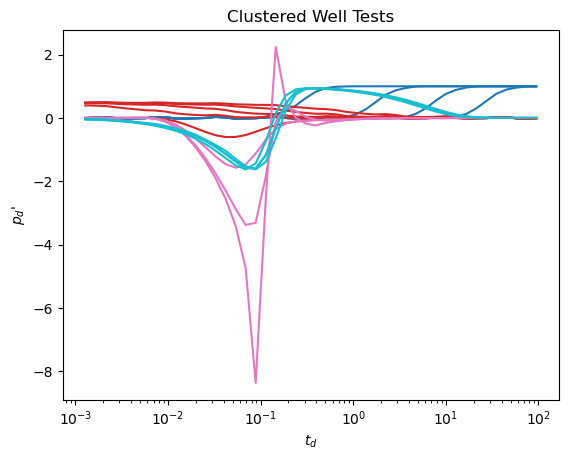

In [52]:
# Define color map for clusters
colorMap = plt.cm.tab10(np.linspace(0,1,4))
# Plot curves and add legend
for i in range(4):
    clusterIndices = np.where(totalMinimumAssignperClusteringAllClusters[clusters] == i)[0] 
    for j in clusterIndices:
        plt.plot(SecPressureDerivativeDataset2[~(SecPressureDerivativeDataset2 == 0).any(axis=1)].values[:,0], SecPressureDerivativeDataset2[~(SecPressureDerivativeDataset2 == 0).any(axis=1)].values[:,j+1], color=colorMap[i,:])
# Add a title and labels to the plot
plt.title("Clustered Well Tests")
plt.xlabel("$t_{d}$")
plt.ylabel("$p_{d}$'")
plt.xscale('log')
#plt.yscale('log')

And this code plots curves which blong to each cluster seperatly 

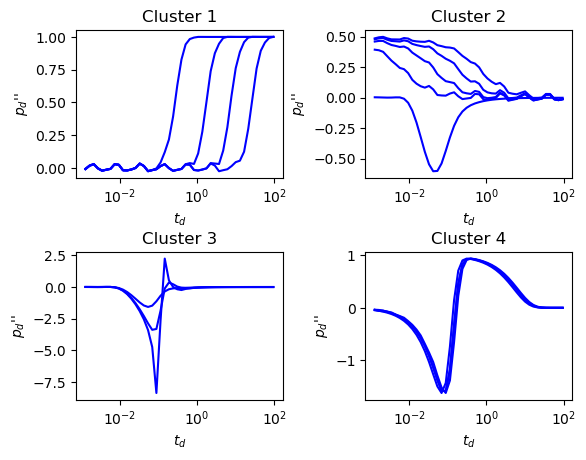

In [53]:
#Create subplots for each cluster
for i in range(4):
    plt.subplot(2, 2, i+1)
    clusterIndices = np.where(totalMinimumAssignperClusteringAllClusters[clusters] == i)[0]
    for j in clusterIndices:
        # Create log-log plot
        plt.plot(SecPressureDerivativeDataset2[~(SecPressureDerivativeDataset2 == 0).any(axis=1)].values[:,0], SecPressureDerivativeDataset2[~(SecPressureDerivativeDataset2== 0).any(axis=1)].values[:,j+1], color='blue')
    # Add labels and title
    plt.xlabel("$t_{d}$")
    plt.ylabel("$p_{d}$''")
    plt.xscale('log')
    plt.title('Cluster ' + str(i+1))
# adjust spacing between subplots
plt.subplots_adjust(wspace=0.4,hspace=0.5)
plt.show()

### Fig. 12

Adjusted Rand index:  0.8205128205128205


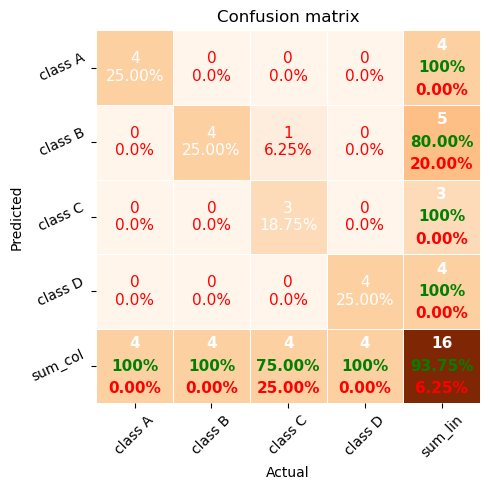

In [43]:
DataframePdDataset1 = pd.DataFrame((SecPressureDerivativeDataset2.iloc[:, 1:].values).T)
predictedClass=totalMinimumAssignperClusteringAllClusters[0]
lables_forPrediction=[mode(predictedClass[0:4]),mode(predictedClass[0:4]),mode(predictedClass[0:4]),mode(predictedClass[0:4]),
                     mode(predictedClass[4:8]),mode(predictedClass[4:8]),mode(predictedClass[4:8]),mode(predictedClass[4:8]),
                     mode(predictedClass[8:12]),mode(predictedClass[8:12]),mode(predictedClass[8:12]),mode(predictedClass[8:12]),
                     mode(predictedClass[12:16]),mode(predictedClass[12:16]),mode(predictedClass[12:16]),mode(predictedClass[12:16]),]
DataframePdDataset1['lables_forPrediction']=lables_forPrediction
DataframePdDataset1['cluster_assignments']=predictedClass
ari = adjusted_rand_score(DataframePdDataset1['lables_forPrediction'], DataframePdDataset1['cluster_assignments'])
print("Adjusted Rand index: ", ari)
pp_matrix_from_data(DataframePdDataset1['lables_forPrediction'], DataframePdDataset1['cluster_assignments'],figsize=[5,5])

So second derivative of pressure is better indicator for classification of PTA in fractured reserviors